# Exploration individual equations *p* parameter set dither

## Anticipation of super-resolution, and other ml output sets
* 8-bit and 16-bit of same image S.T. psnr is high
* pairs of grayscale for super resolution (2 ways)
    * higher resolution by pixel size
    * higher resolution by pixel depth & pixel size
* edge mapping for both
    
## Generate and display:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
whole_page_start_time = time.time()

import os
import sys
import inspect
import tempfile

import skimage.io as im_io

from PIL import TiffImagePlugin as tip
from PIL.TiffImagePlugin import Image

import matplotlib.pyplot as pyplot

sys.path.insert(0, '../src/')
sys.path.insert(0, 'scalygraphic/src/')

from im_scale_products import *
from impute_color import *

def get_test_domain_dict(it_max=None, scale_dist=None):
    """ Usage: 
    domain_dict = get_center_domain_dict(it_max, scale_dist)
    """
    if it_max is None:
        it_max = 64
        
    if scale_dist is None:
        scale_dist = 12
        
    domain_dict = get_default_domain_dict()
    domain_dict['it_max'] = it_max
    domain_dict['max_d'] = scale_dist / domain_dict['zoom']
    domain_dict['n_rows'] = 255
    domain_dict['n_cols'] = 255
    
    return domain_dict

def get_results_gray_set(list_tuple, domain_dict):
    """ Usage: new_im = get_results_gray_set(list_tuple, domain_dict)
    
    """
    ET, Z, Z0 = eq_iter.get_primitives(list_tuple, domain_dict)
    Zd_n2, Zr_n2, ETn_n2 = etg_norm(Z0, Z, ET)

    g_im_et = primitive_2_gray(ETn_n2)
    # complex result vectors: distance component
    g_im_Zd = primitive_2_gray(Zd_n2)

    # complex result vectors: rotation component
    g_im_Zr = primitive_2_gray(Zr_n2)

    im_gray = get_gray_im(ET, Z, Z0)

    im_list = [g_im_et, g_im_Zd, g_im_Zr, im_gray]
    new_im = cat_im_list_hori(im_list)
    
    return new_im
    
def display_calc_result(list_tuple, domain_dict):
    """ Usage: (None) display_calc_result(list_tuple, domain_dict)
    
    """
    t0 = time.time()
    new_im = get_results_gray_set(list_tuple, domain_dict)
    tt = time.time() - t0
    print('domain & run constraints:')
    for k, v in domain_dict.items():
        print('%30s: %s'%(k,v))
    print('\n')
    print('%20s: %0.6f seconds\n%20s:'%(fcn_name, tt, 'parameters'), p)
    print('\n%15s%30s%30s%30s'%('ET','Zd','Zr', 'All'))
    display(new_im)
    
def display_source(fctn_hndl):
    """ Usage: (None) display_source(fctn_hndl)
                print the source code for a givin function
    """
    S = inspect.getsource(fctn_hndl)
    print(S)

print('\t\t\tDomain dictionary for test:')
domain_dict = get_test_domain_dict()
for k, v in domain_dict.items():
    print(k,v)
    
print('\n\tEnumeration of available functions: tuples of (Name, function_handle)\n')
for k, v in name_functionhandle_dict.items():
    print('%3i %25s'%(k, v[0]), v[1])

			Domain dictionary for test:
center_point 0j
zoom 0.5
theta 0.0
it_max 64
max_d 24.0
n_rows 255
n_cols 255

	Enumeration of available functions: tuples of (Name, function_handle)

  0                    ElGato <function ElGato at 0x7fa5c07e4ea0>
  1                  IslaLace <function IslaLace at 0x7fa5c07e4c80>
  2              ItchicuPpwrF <function ItchicuPpwrF at 0x7fa5c07e4d90>
  3                  Nautuliz <function Nautuliz at 0x7fa5c07e49d8>
  4                    RoyalZ <function RoyalZ at 0x7fa5c07e4d08>
  5                bugga_bear <function bugga_bear at 0x7fa5c07e47b8>
  6                de_Okeeffe <function de_Okeeffe at 0x7fa5c07e4bf8>
  7                 decPwrAFx <function decPwrAFx at 0x7fa5c07e4ae8>
  8                dreadSkull <function dreadSkull at 0x7fa5c07e4b70>
  9                      nlC3 <function nlC3 at 0x7fa5c07e4a60>
 10                      plC6 <function plC6 at 0x7fa5c07e4e18>
 11                     snflk <function snflk at 0x7fa5c07f2048>
 12   

In [ ]:
"""
                    ElGato exploration
"""
# scale dist == multiplier of domain diagonal to get escape distance
scale_dist = 12

domain_dict = get_test_domain_dict()
fcn_number = 0

fcn_name, fcn = name_functionhandle_dict[fcn_number][0], name_functionhandle_dict[fcn_number][1]
p = p = fcn(0.0, None)
list_tuple = [(fcn, (p))]

z1 = [k/2 for k in range(6, 0, -1)]
z2 = [1/((1+k)**k) for k in range(2, 10)]
zoom_fact_list = z1 + z2

n_to_go = len(zoom_fact_list)
display_source(fcn)
print('Iterate %i times'%(n_to_go))

for zoom_fact in zoom_fact_list:
    domain_dict['zoom'] = zoom_fact
    domain_dict['max_d'] = scale_dist / domain_dict['zoom']
    print('\t\t%i to go'%(n_to_go))
    n_to_go -= 1
    display_calc_result(list_tuple, domain_dict)

In [ ]:
"""
                    IslaLace exploration
"""
# scale dist == multiplier of domain diagonal to get escape distance
scale_dist = 12

domain_dict = get_test_domain_dict()
fcn_number = 1

fcn_name, fcn = name_functionhandle_dict[fcn_number][0], name_functionhandle_dict[fcn_number][1]
p = p = fcn(0.0, None)
list_tuple = [(fcn, (p))]

z1 = [k/2 for k in range(6, 0, -1)]
z2 = [1/((1+k)**k) for k in range(2, 10)]
zoom_fact_list = z1 + z2

n_to_go = len(zoom_fact_list)
display_source(fcn)
print('Iterate %i times'%(n_to_go))

for zoom_fact in zoom_fact_list:
    domain_dict['zoom'] = zoom_fact
    domain_dict['max_d'] = scale_dist / domain_dict['zoom']
    print('\t\t%i to go'%(n_to_go))
    n_to_go -= 1
    display_calc_result(list_tuple, domain_dict)

In [ ]:
"""
                    ItchicuPpwrF exploration
"""
# scale dist == multiplier of domain diagonal to get escape distance
scale_dist = 12

domain_dict = get_test_domain_dict()
fcn_number = 2

fcn_name, fcn = name_functionhandle_dict[fcn_number][0], name_functionhandle_dict[fcn_number][1]
p = p = fcn(0.0, None)
list_tuple = [(fcn, (p))]

z1 = [k/2 for k in range(6, 0, -1)]
z2 = [1/((1+k)**k) for k in range(2, 10)]
zoom_fact_list = z1 + z2

n_to_go = len(zoom_fact_list)
display_source(fcn)
print('Iterate %i times'%(n_to_go))

for zoom_fact in zoom_fact_list:
    domain_dict['zoom'] = zoom_fact
    domain_dict['max_d'] = scale_dist / domain_dict['zoom']
    print('\t\t%i to go'%(n_to_go))
    n_to_go -= 1
    display_calc_result(list_tuple, domain_dict)

In [ ]:
"""
                    Nautuliz exploration
"""
# scale dist == multiplier of domain diagonal to get escape distance
scale_dist = 12

domain_dict = get_test_domain_dict()
fcn_number = 3

fcn_name, fcn = name_functionhandle_dict[fcn_number][0], name_functionhandle_dict[fcn_number][1]
p = p = fcn(0.0, None)
list_tuple = [(fcn, (p))]

z1 = [k/2 for k in range(6, 0, -1)]
z2 = [1/((1+k)**k) for k in range(2, 10)]
zoom_fact_list = z1 + z2

n_to_go = len(zoom_fact_list)
display_source(fcn)
print('Iterate %i times'%(n_to_go))

for zoom_fact in zoom_fact_list:
    domain_dict['zoom'] = zoom_fact
    domain_dict['max_d'] = scale_dist / domain_dict['zoom']
    print('\t\t%i to go'%(n_to_go))
    n_to_go -= 1
    display_calc_result(list_tuple, domain_dict)

In [ ]:
"""
                    RoyalZ exploration
"""
# scale dist == multiplier of domain diagonal to get escape distance
scale_dist = 12

domain_dict = get_test_domain_dict()
fcn_number = 4

fcn_name, fcn = name_functionhandle_dict[fcn_number][0], name_functionhandle_dict[fcn_number][1]
p = p = fcn(0.0, None)
list_tuple = [(fcn, (p))]

z1 = [k/2 for k in range(6, 0, -1)]
z2 = [1/((1+k)**k) for k in range(2, 10)]
zoom_fact_list = z1 + z2

n_to_go = len(zoom_fact_list)
display_source(fcn)
print('Iterate %i times'%(n_to_go))

for zoom_fact in zoom_fact_list:
    domain_dict['zoom'] = zoom_fact
    domain_dict['max_d'] = scale_dist / domain_dict['zoom']
    print('\t\t%i to go'%(n_to_go))
    n_to_go -= 1
    display_calc_result(list_tuple, domain_dict)

In [ ]:
"""
                    bugga_bear exploration
"""
# scale dist == multiplier of domain diagonal to get escape distance
scale_dist = 12

domain_dict = get_test_domain_dict()
fcn_number = 5

fcn_name, fcn = name_functionhandle_dict[fcn_number][0], name_functionhandle_dict[fcn_number][1]
p = p = fcn(0.0, None)
list_tuple = [(fcn, (p))]

z1 = [k/2 for k in range(6, 0, -1)]
z2 = [1/((1+k)**k) for k in range(2, 10)]
zoom_fact_list = z1 + z2

n_to_go = len(zoom_fact_list)
display_source(fcn)
print('Iterate %i times'%(n_to_go))

for zoom_fact in zoom_fact_list:
    domain_dict['zoom'] = zoom_fact
    domain_dict['max_d'] = scale_dist / domain_dict['zoom']
    print('\t\t%i to go'%(n_to_go))
    n_to_go -= 1
    display_calc_result(list_tuple, domain_dict)

def bugga_bear(Z, p, Z0=None, ET=None):
    """ Z = bugga_bear(Z, p)
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    EPSILON = 1e-15

    if p is None:
        return [-0.851612290000, -1.794358160000, -4.450415130000]
    if Z == 0.0+0.0j:
        return np.Inf
    c = np.sqrt(np.pi)
    try:
        for n in range(1, len(p)+1):
            Zok = np.isfinite(Z)
            if Zok and np.abs(Z) != 0:
                Z = 1 / Z - Z**( n * (Z**( p[n-1]**n )) / c)
            elif Zok:
                Z = 1 / EPSILON - Z**( n * (Z**( p[n-1]**n )) / c)
    except:
        pass
    return Z



			parameter set 0 of 5

Zoom 4 times
		4 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 1.0
                         theta: 0.0
                        it_max: 64
                         max_d: 12.0
                        n_rows: 255
                

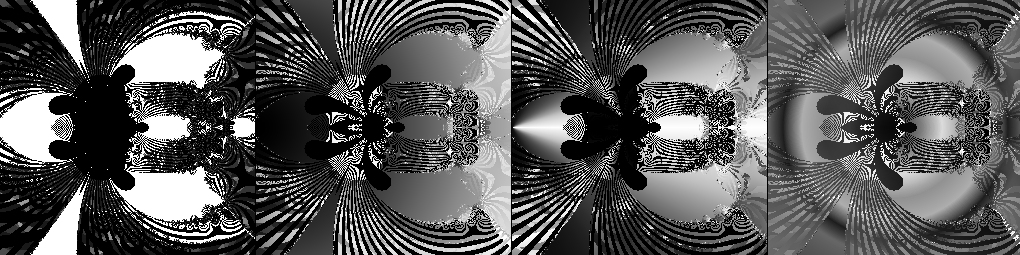

		3 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 0.5
                         theta: 0.0
                        it_max: 64
                         max_d: 24.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmp971f8lcj


          bugga_bear: 3.714490 seconds
          parameters: [-0.85638759 -1.80992578 -4.43967071]

             ET                            Zd                            Zr                           All


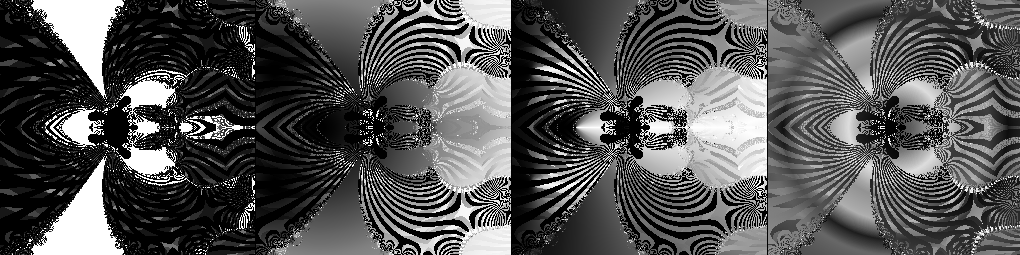

		2 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 0.1111111111111111
                         theta: 0.0
                        it_max: 64
                         max_d: 108.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmp_3ab3rqm


          bugga_bear: 10.275743 seconds
          parameters: [-0.85638759 -1.80992578 -4.43967071]

             ET                            Zd                            Zr                           All


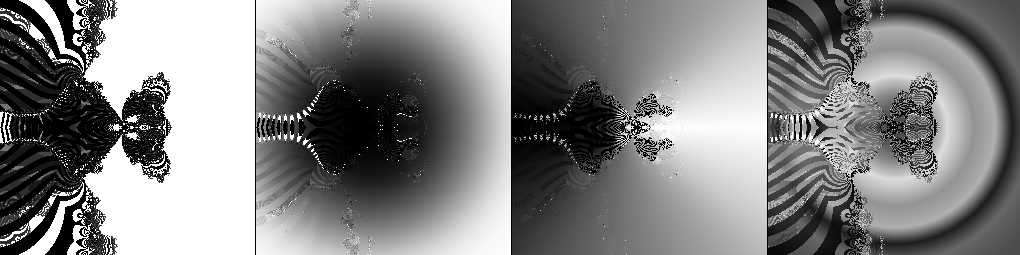

		1 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 0.015625
                         theta: 0.0
                        it_max: 64
                         max_d: 768.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmpcay9dt4k


          bugga_bear: 16.506340 seconds
          parameters: [-0.85638759 -1.80992578 -4.43967071]

             ET                            Zd                            Zr                           All


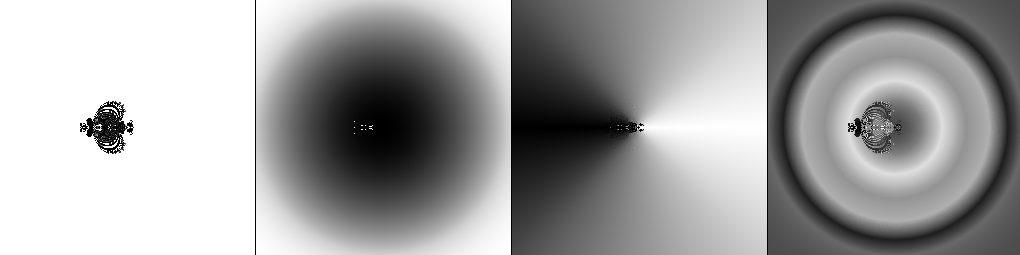



			parameter set 1 of 5

Zoom 4 times
		4 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 1.0
                         theta: 0.0
                        it_max: 64
                         max_d: 12.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmpwxahjzl9


          bugga_bear: 4.678463 seconds
          parameters: [-0.84718292 -1.7798986  -4.43901769]

             ET                            Zd                            Zr                           All


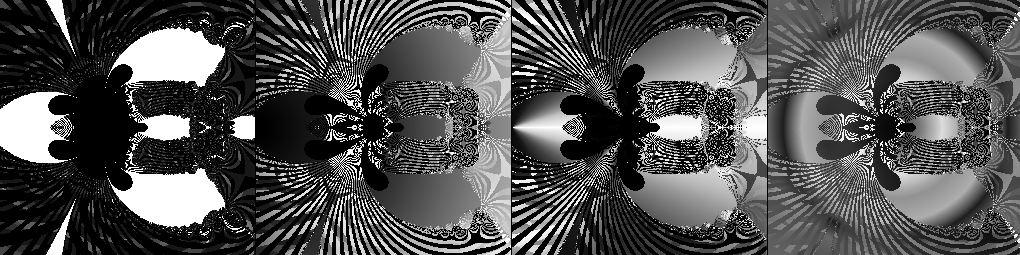

		3 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 0.5
                         theta: 0.0
                        it_max: 64
                         max_d: 24.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmpw8tssl1d


          bugga_bear: 2.656161 seconds
          parameters: [-0.84718292 -1.7798986  -4.43901769]

             ET                            Zd                            Zr                           All


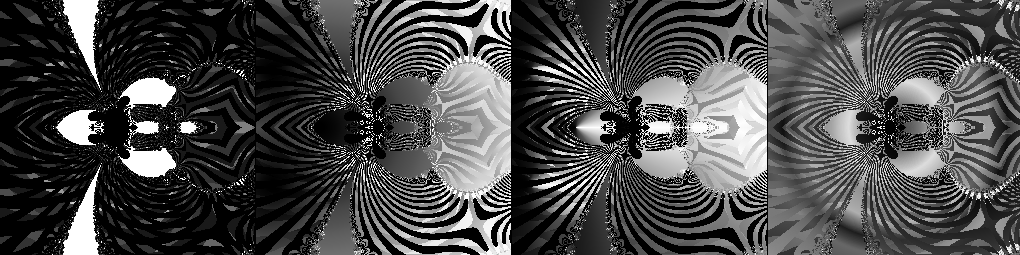

		2 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 0.1111111111111111
                         theta: 0.0
                        it_max: 64
                         max_d: 108.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmp26h0_gbi


          bugga_bear: 7.126889 seconds
          parameters: [-0.84718292 -1.7798986  -4.43901769]

             ET                            Zd                            Zr                           All


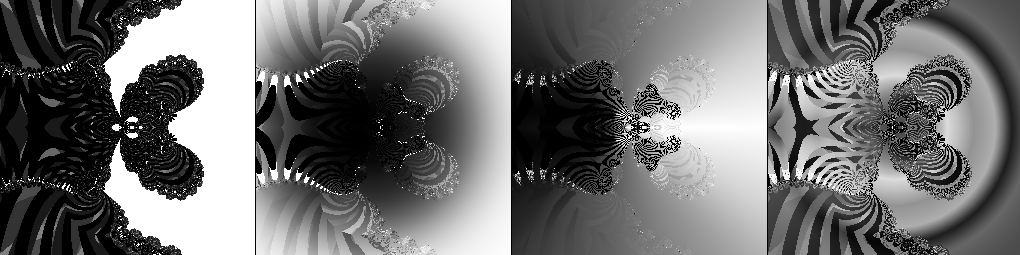

		1 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 0.015625
                         theta: 0.0
                        it_max: 64
                         max_d: 768.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmplf852m3x


          bugga_bear: 10.656657 seconds
          parameters: [-0.84718292 -1.7798986  -4.43901769]

             ET                            Zd                            Zr                           All


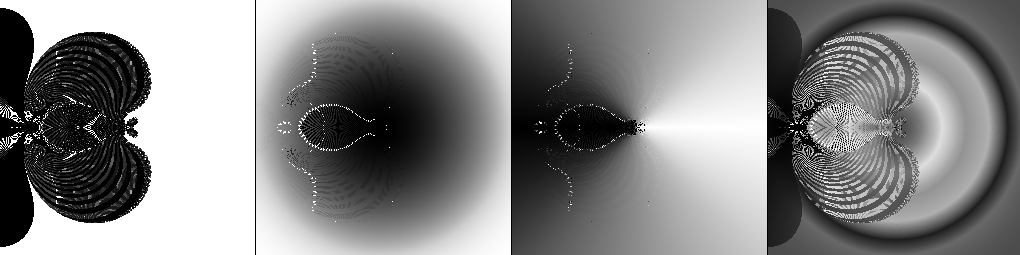



			parameter set 2 of 5

Zoom 4 times
		4 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 1.0
                         theta: 0.0
                        it_max: 64
                         max_d: 12.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmpz86scrff


          bugga_bear: 4.606153 seconds
          parameters: [-0.8551354  -1.77690694 -4.44947977]

             ET                            Zd                            Zr                           All


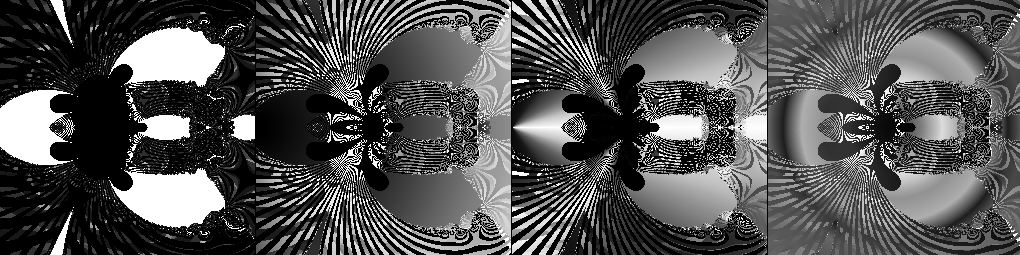

		3 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 0.5
                         theta: 0.0
                        it_max: 64
                         max_d: 24.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmp4iu9xbkt


          bugga_bear: 2.659079 seconds
          parameters: [-0.8551354  -1.77690694 -4.44947977]

             ET                            Zd                            Zr                           All


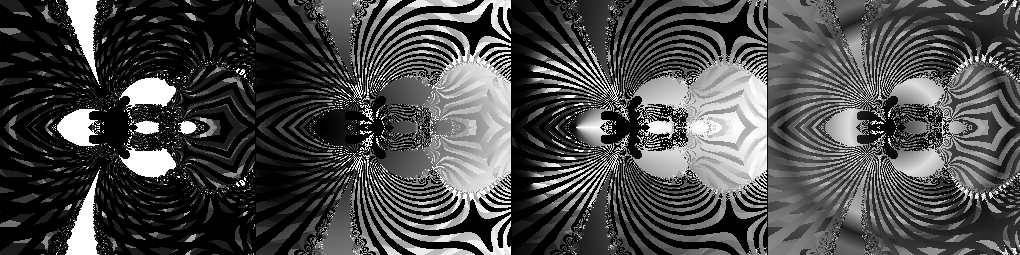

		2 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 0.1111111111111111
                         theta: 0.0
                        it_max: 64
                         max_d: 108.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmphrknjm_l


          bugga_bear: 6.423565 seconds
          parameters: [-0.8551354  -1.77690694 -4.44947977]

             ET                            Zd                            Zr                           All


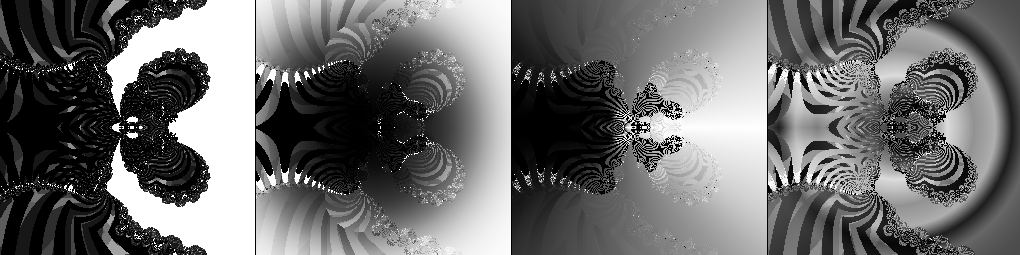

		1 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 0.015625
                         theta: 0.0
                        it_max: 64
                         max_d: 768.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmpnd2m_7rb


          bugga_bear: 9.690886 seconds
          parameters: [-0.8551354  -1.77690694 -4.44947977]

             ET                            Zd                            Zr                           All


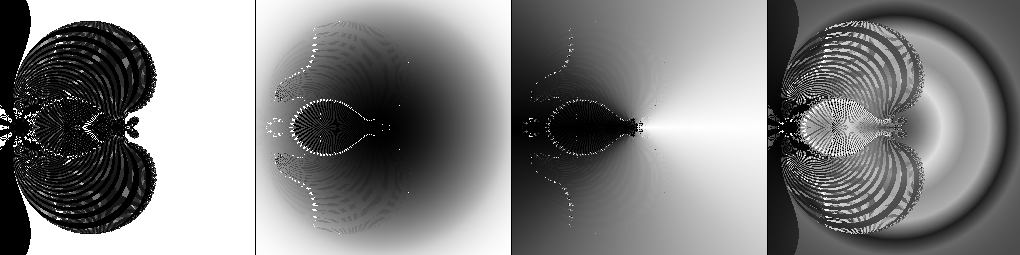



			parameter set 3 of 5

Zoom 4 times
		4 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 1.0
                         theta: 0.0
                        it_max: 64
                         max_d: 12.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmpcy7mggbf


          bugga_bear: 4.797199 seconds
          parameters: [-0.85254774 -1.78797691 -4.46366534]

             ET                            Zd                            Zr                           All


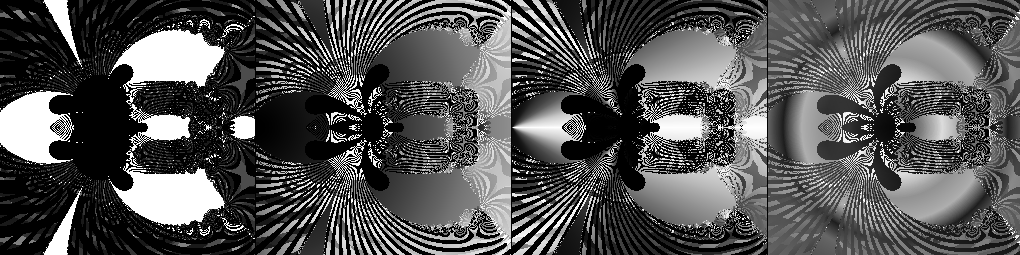

		3 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 0.5
                         theta: 0.0
                        it_max: 64
                         max_d: 24.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmp5m9uz6dh


          bugga_bear: 3.074603 seconds
          parameters: [-0.85254774 -1.78797691 -4.46366534]

             ET                            Zd                            Zr                           All


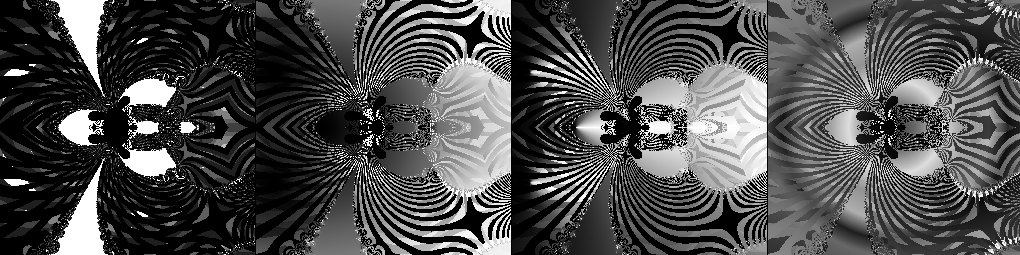

		2 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 0.1111111111111111
                         theta: 0.0
                        it_max: 64
                         max_d: 108.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmpuzqr1yqi


          bugga_bear: 8.175507 seconds
          parameters: [-0.85254774 -1.78797691 -4.46366534]

             ET                            Zd                            Zr                           All


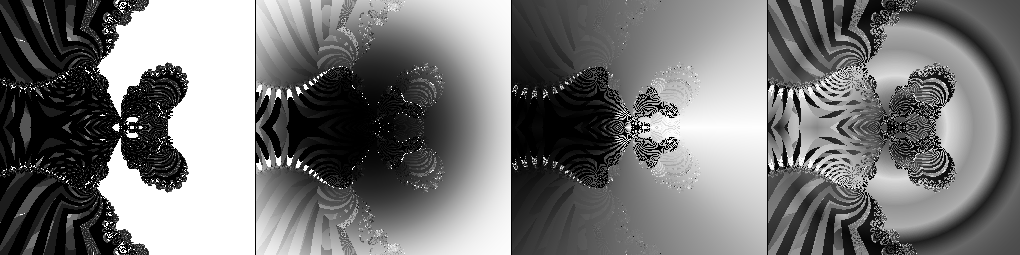

		1 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 0.015625
                         theta: 0.0
                        it_max: 64
                         max_d: 768.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmpcluca1e6


          bugga_bear: 14.904314 seconds
          parameters: [-0.85254774 -1.78797691 -4.46366534]

             ET                            Zd                            Zr                           All


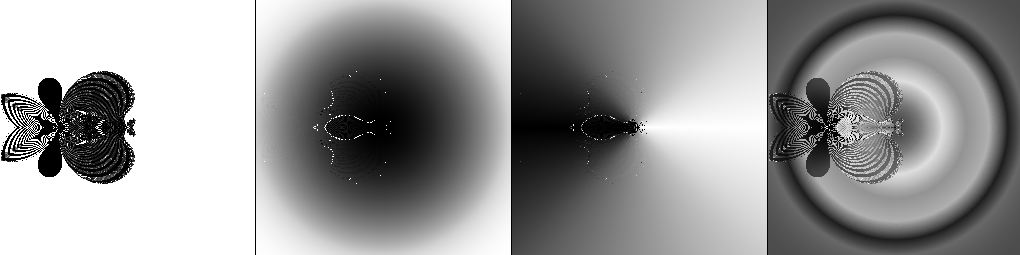



			parameter set 4 of 5

Zoom 4 times
		4 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 1.0
                         theta: 0.0
                        it_max: 64
                         max_d: 12.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmp3em2kvwu


          bugga_bear: 4.519517 seconds
          parameters: [-0.85918181 -1.78516868 -4.44348624]

             ET                            Zd                            Zr                           All


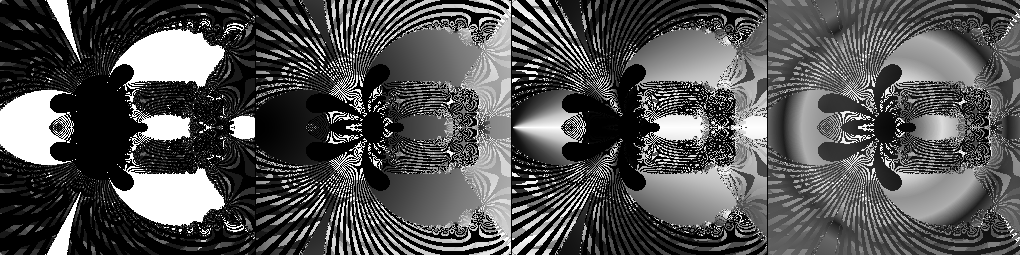

		3 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 0.5
                         theta: 0.0
                        it_max: 64
                         max_d: 24.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmpnosi8akv


          bugga_bear: 2.803144 seconds
          parameters: [-0.85918181 -1.78516868 -4.44348624]

             ET                            Zd                            Zr                           All


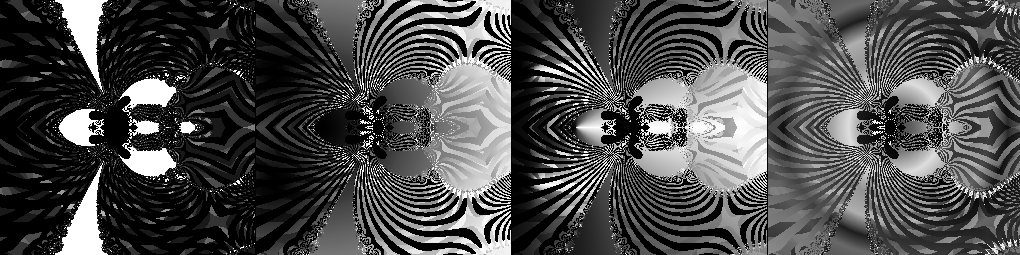

		2 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 0.1111111111111111
                         theta: 0.0
                        it_max: 64
                         max_d: 108.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmpgfntwoq9


          bugga_bear: 7.917705 seconds
          parameters: [-0.85918181 -1.78516868 -4.44348624]

             ET                            Zd                            Zr                           All


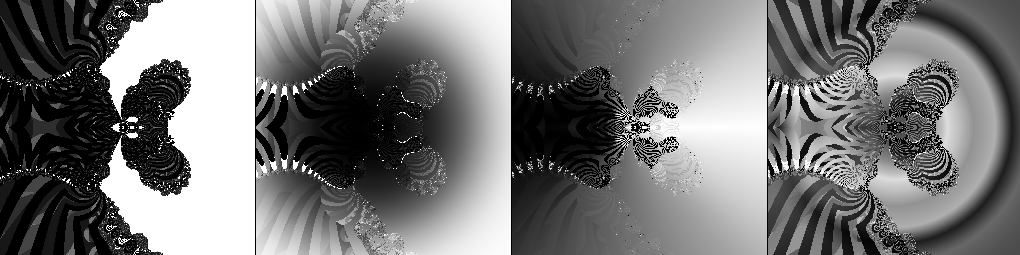

		1 to go
domain & run constraints:
                  center_point: 0j
                          zoom: 0.015625
                         theta: 0.0
                        it_max: 64
                         max_d: 768.0
                        n_rows: 255
                        n_cols: 255
                       tmp_dir: /var/folders/7y/bf1fndjd1w3_qjbnrmb3n_4m0000gn/T/tmpjoaw9zb_


          bugga_bear: 14.441255 seconds
          parameters: [-0.85918181 -1.78516868 -4.44348624]

             ET                            Zd                            Zr                           All


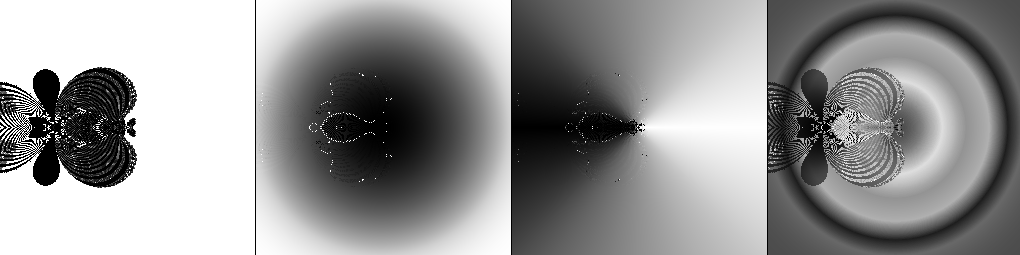

In [2]:
"""
                    bugga_bear exploration - parameters
"""
number_p_variations = 5
dither_divisor = 100
parameters = [-0.85161229, -1.79435816, -4.45041513]
# scale dist == multiplier of domain diagonal to get escape distance
scale_dist = 12

domain_dict = get_test_domain_dict()
fcn_number = 5

fcn_name, fcn = name_functionhandle_dict[fcn_number][0], name_functionhandle_dict[fcn_number][1]
display_source(fcn)
for k in range(number_p_variations):
    # p = p = fcn(0.0, None)
    p = parameters + np.random.randn(len(parameters)) / dither_divisor
    list_tuple = [(fcn, (p))]
    print('\n\n\t\t\tparameter set %i of %i\n'%(k, number_p_variations))
    zoom_fact_list = [1/((1+k)**k) for k in range(0, 4)]

    n_to_go = len(zoom_fact_list)
    print('Zoom %i times'%(n_to_go))

    for zoom_fact in zoom_fact_list:
        domain_dict['zoom'] = zoom_fact
        domain_dict['max_d'] = scale_dist / domain_dict['zoom']
        print('\t\t%i to go'%(n_to_go))
        n_to_go -= 1
        display_calc_result(list_tuple, domain_dict)

In [ ]:
"""
                    de_Okeeffe exploration
"""
# scale dist == multiplier of domain diagonal to get escape distance
scale_dist = 12

domain_dict = get_test_domain_dict()
fcn_number = 6

fcn_name, fcn = name_functionhandle_dict[fcn_number][0], name_functionhandle_dict[fcn_number][1]
p = p = fcn(0.0, None)
list_tuple = [(fcn, (p))]

z1 = [k/2 for k in range(6, 0, -1)]
z2 = [1/((1+k)**k) for k in range(2, 10)]
zoom_fact_list = z1 + z2

n_to_go = len(zoom_fact_list)
display_source(fcn)
print('Iterate %i times'%(n_to_go))

for zoom_fact in zoom_fact_list:
    domain_dict['zoom'] = zoom_fact
    domain_dict['max_d'] = scale_dist / domain_dict['zoom']
    print('\t\t%i to go'%(n_to_go))
    n_to_go -= 1
    display_calc_result(list_tuple, domain_dict)

In [ ]:
"""
                    decPwrAFx exploration
"""
# scale dist == multiplier of domain diagonal to get escape distance
scale_dist = 12

domain_dict = get_test_domain_dict()
fcn_number = 7

fcn_name, fcn = name_functionhandle_dict[fcn_number][0], name_functionhandle_dict[fcn_number][1]
p = p = fcn(0.0, None)
list_tuple = [(fcn, (p))]

z1 = [k/2 for k in range(6, 0, -1)]
z2 = [1/((1+k)**k) for k in range(2, 10)]
zoom_fact_list = z1 + z2

n_to_go = len(zoom_fact_list)
display_source(fcn)
print('Iterate %i times'%(n_to_go))

for zoom_fact in zoom_fact_list:
    domain_dict['zoom'] = zoom_fact
    domain_dict['max_d'] = scale_dist / domain_dict['zoom']
    print('\t\t%i to go'%(n_to_go))
    n_to_go -= 1
    display_calc_result(list_tuple, domain_dict)

In [ ]:
"""
                    dreadSkull exploration
"""
# scale dist == multiplier of domain diagonal to get escape distance
scale_dist = 12

domain_dict = get_test_domain_dict()
fcn_number = 8

fcn_name, fcn = name_functionhandle_dict[fcn_number][0], name_functionhandle_dict[fcn_number][1]
p = p = fcn(0.0, None)
list_tuple = [(fcn, (p))]

z1 = [k/2 for k in range(6, 0, -1)]
z2 = [1/((1+k)**k) for k in range(2, 10)]
zoom_fact_list = z1 + z2

n_to_go = len(zoom_fact_list)
display_source(fcn)
print('Iterate %i times'%(n_to_go))

for zoom_fact in zoom_fact_list:
    domain_dict['zoom'] = zoom_fact
    domain_dict['max_d'] = scale_dist / domain_dict['zoom']
    print('\t\t%i to go'%(n_to_go))
    n_to_go -= 1
    display_calc_result(list_tuple, domain_dict)

In [ ]:
"""
                    nlc3 exploration
"""
# scale dist == multiplier of domain diagonal to get escape distance
scale_dist = 12

domain_dict = get_test_domain_dict()
fcn_number = 9

fcn_name, fcn = name_functionhandle_dict[fcn_number][0], name_functionhandle_dict[fcn_number][1]
p = p = fcn(0.0, None)
list_tuple = [(fcn, (p))]

z1 = [k/2 for k in range(6, 0, -1)]
z2 = [1/((1+k)**k) for k in range(2, 10)]
zoom_fact_list = z1 + z2

n_to_go = len(zoom_fact_list)
display_source(fcn)
print('Iterate %i times'%(n_to_go))

for zoom_fact in zoom_fact_list:
    domain_dict['zoom'] = zoom_fact
    domain_dict['max_d'] = scale_dist / domain_dict['zoom']
    print('\t\t%i to go'%(n_to_go))
    n_to_go -= 1
    display_calc_result(list_tuple, domain_dict)

In [ ]:
"""
                    plC6 exploration
"""
# scale dist == multiplier of domain diagonal to get escape distance
scale_dist = 12

domain_dict = get_test_domain_dict()
fcn_number = 10

fcn_name, fcn = name_functionhandle_dict[fcn_number][0], name_functionhandle_dict[fcn_number][1]
p = p = fcn(0.0, None)
list_tuple = [(fcn, (p))]

z1 = [k/2 for k in range(6, 0, -1)]
z2 = [1/((1+k)**k) for k in range(2, 10)]
zoom_fact_list = z1 + z2

n_to_go = len(zoom_fact_list)
display_source(fcn)
print('Zoom Out %i times'%(n_to_go))

for zoom_fact in zoom_fact_list:
    domain_dict['zoom'] = zoom_fact
    domain_dict['max_d'] = scale_dist / domain_dict['zoom']
    print('\t\t%i to go'%(n_to_go))
    n_to_go -= 1
    display_calc_result(list_tuple, domain_dict)

In [ ]:
"""
                    snflk (snowflake) exploration
"""
# scale dist == multiplier of domain diagonal to get escape distance
scale_dist = 12

domain_dict = get_test_domain_dict()
fcn_number = 11

fcn_name, fcn = name_functionhandle_dict[fcn_number][0], name_functionhandle_dict[fcn_number][1]
p = p = fcn(0.0, None)
list_tuple = [(fcn, (p))]

z1 = [k/2 for k in range(6, 0, -1)]
z2 = [1/((1+k)**k) for k in range(2, 10)]
zoom_fact_list = z1 + z2

n_to_go = len(zoom_fact_list)
display_source(fcn)
print('Zoom Out %i times'%(n_to_go))

for zoom_fact in zoom_fact_list:
    domain_dict['zoom'] = zoom_fact
    domain_dict['max_d'] = scale_dist / domain_dict['zoom']
    print('\t\t%i to go'%(n_to_go))
    n_to_go -= 1
    display_calc_result(list_tuple, domain_dict)

In [ ]:
"""
                    starfish_ish exploration
"""
# scale dist == multiplier of domain diagonal to get escape distance
scale_dist = 12

domain_dict = get_test_domain_dict()
fcn_number = 12

fcn_name, fcn = name_functionhandle_dict[fcn_number][0], name_functionhandle_dict[fcn_number][1]
p = p = fcn(0.0, None)
list_tuple = [(fcn, (p))]

z1 = [k/2 for k in range(6, 0, -1)]
z2 = [1/((1+k)**k) for k in range(2, 10)]
zoom_fact_list = z1 + z2

n_to_go = len(zoom_fact_list)
display_source(fcn)
print('Zoom Out %i times'%(n_to_go))

for zoom_fact in zoom_fact_list:
    domain_dict['zoom'] = zoom_fact
    domain_dict['max_d'] = scale_dist / domain_dict['zoom']
    print('\t\t%i to go'%(n_to_go))
    n_to_go -= 1
    display_calc_result(list_tuple, domain_dict)


In [ ]:
"""
                    starfish_ish_II exploration
"""
# scale dist == multiplier of domain diagonal to get escape distance
scale_dist = 12

domain_dict = get_test_domain_dict()
fcn_number = 13 # starfish_ish_II

fcn_name, fcn = name_functionhandle_dict[fcn_number][0], name_functionhandle_dict[fcn_number][1]
p = p = fcn(0.0, None)
list_tuple = [(fcn, (p))]

z1 = [k/2 for k in range(6, 0, -1)]
z2 = [1/((1+k)**k) for k in range(2, 10)]
zoom_fact_list = z1 + z2

n_to_go = len(zoom_fact_list)
display_source(fcn)
print('Zoom Out %i times'%(n_to_go))

for zoom_fact in zoom_fact_list:
    domain_dict['zoom'] = zoom_fact
    domain_dict['max_d'] = scale_dist / domain_dict['zoom']
    print('\t\t%i to go'%(n_to_go))
    n_to_go -= 1
    display_calc_result(list_tuple, domain_dict)


In [ ]:
"""
                    thunderhead exploration
"""
# scale dist == multiplier of domain diagonal to get escape distance
scale_dist = 12

domain_dict = get_test_domain_dict()
fcn_number = 14 # thunderhead

fcn_name, fcn = name_functionhandle_dict[fcn_number][0], name_functionhandle_dict[fcn_number][1]
p = p = fcn(0.0, None)
list_tuple = [(fcn, (p))]

# zoom_fact_list = [1/k for k in range(1, 200, 10)]
zoom_fact_list = [1/((1+k)**k) for k in range(0, 10)]

n_to_go = len(zoom_fact_list)
display_source(fcn)
print('Zoom Out %i times'%(n_to_go))

for zoom_fact in zoom_fact_list:
    domain_dict['zoom'] = zoom_fact
    domain_dict['max_d'] = scale_dist / domain_dict['zoom']
    print('\t\t%i to go'%(n_to_go))
    n_to_go -= 1

    display_calc_result(list_tuple, domain_dict)


In [ ]:
whole_page_run_time = time.time() - whole_page_start_time
print('Total Time - Run all Cells = %im %0.3fs'%(whole_page_run_time//60, whole_page_run_time%60))

In [ ]:
"""
            Nov 12, 2019 run all 15 available (chance-known eq parameters) - lukewarm frame
            Total Time - Run all Cells = 16m 6.295s
            
"""
print('')